# Episode 21. Time Series Forecasting with MLP


## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10

## Data

In [ ]:
# Original Data Source: https://fred.stlouisfed.org/series/RSXFSN
from google.colab import files
uploaded = files.upload()

Saving RSXFSN.csv to RSXFSN.csv


In [ ]:
# Store data in DataFrame
df = pd.read_csv("RSXFSN.csv")

In [ ]:
# keep real GDP only
keep_columns = ['RSXFSN']
df = df[keep_columns]
# rescale
df = df/10000

## Data Preprocessing

In [ ]:
# split train & test data
n_train = int(len(df) * 0.8)
n_test = len(df) - n_train
train, test = df.iloc[0:n_train], df.iloc[n_train:len(df)]
print(len(train), len(test))

288 72


In [ ]:
def get_timeseries(x, n_steps=1):
    x_ts, y_ts = [], []
    for ii in range(len(x) - n_steps):
        v = x.iloc[ii:(ii + n_steps)].values
        x_ts.append(v)
        w = x.iloc[ii + n_steps].values
        y_ts.append(w)
    return np.array(x_ts), np.array(y_ts)

In [ ]:
n_steps = 16
n_features = 1

# convert to a time series dimension: [samples, n_steps, n_features]

x_train, y_train = get_timeseries(train, n_steps)
x_test, y_test = get_timeseries(test,n_steps)

print(x_train.shape, y_train.shape)

(272, 16, 1) (272, 1)


## Modeling

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(0.001))

## Training

In [ ]:
# fit model
history = model.fit(x_train, y_train,epochs=500,batch_size=32,validation_split=0.1,verbose=1,shuffle=False)

Epoch 1/500
8/8 [==============================] - 1s 28ms/step - loss: 55.2401 - val_loss: 35.3930
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 35.1509 - val_loss: 21.5045
Epoch 3/500
8/8 [==============================] - 0s 5ms/step - loss: 9.1439 - val_loss: 24.5754
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 8.4567 - val_loss: 7.9874
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 7.5340 - val_loss: 10.5402
Epoch 6/500
8/8 [==============================] - 0s 5ms/step - loss: 4.8092 - val_loss: 8.4909
Epoch 7/500
8/8 [==============================] - 0s 5ms/step - loss: 5.0948 - val_loss: 7.3388
Epoch 8/500
8/8 [==============================] - 0s 6ms/step - loss: 5.0001 - val_loss: 7.4171
Epoch 9/500
8/8 [==============================] - 0s 6ms/step - loss: 4.5835 - val_loss: 7.1917
Epoch 10/500
8/8 [==============================] - 0s 6ms/step - loss: 4.6679 - val_loss: 7.1434
Epoch 11/500
8/8 [====

## Evaluation

In [ ]:
y_pred = model.predict(x_test)

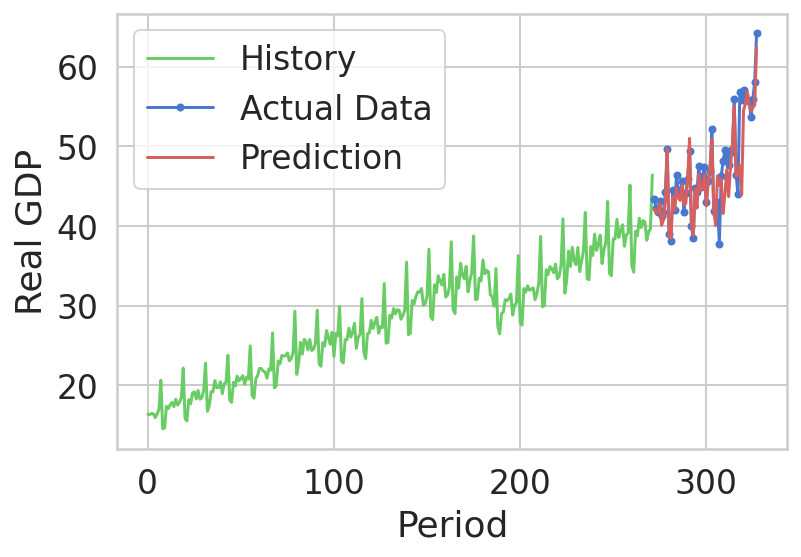

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

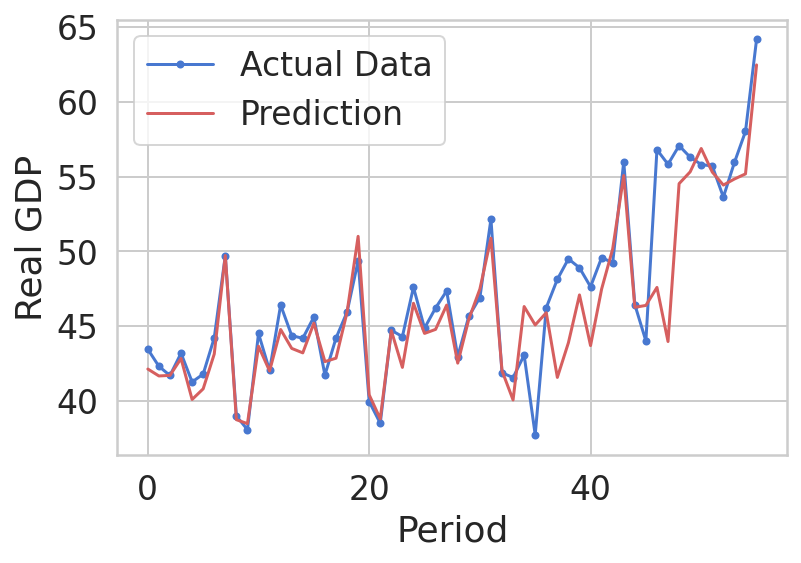

In [ ]:
plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();